In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [78]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


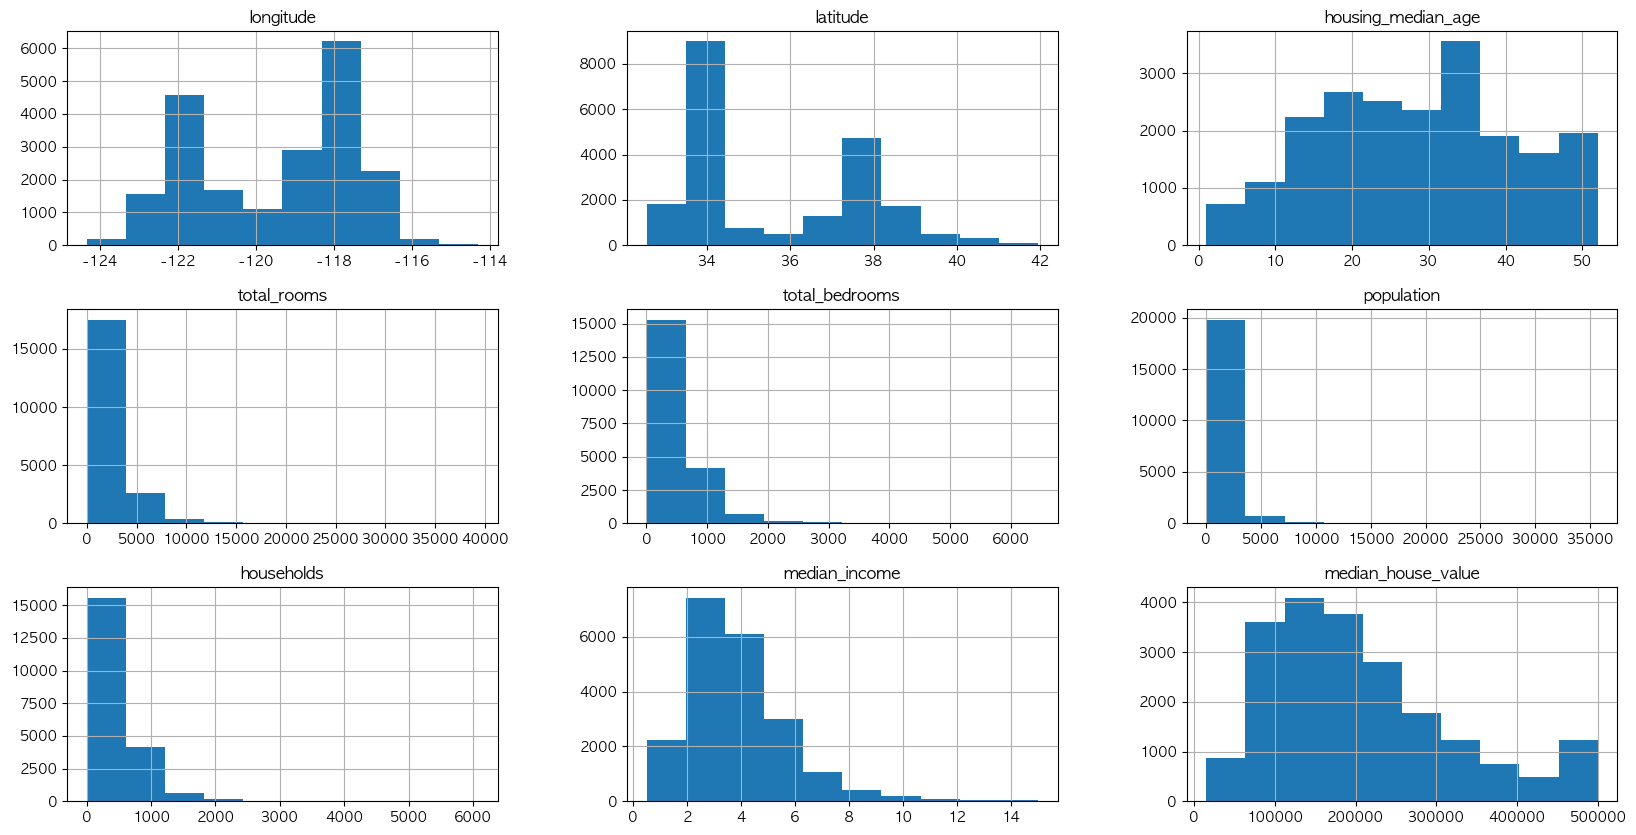

In [46]:
df.hist(figsize=(20,10))
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [49]:
# EDA
# 결측치 삭제 ---> 침대갯수 필요 없어서 ..?
df.dropna(inplace=True)


In [50]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [79]:
# 주요 변수만 따로 빼낸 변수 만들기
df_eda = df[['median_house_value', 'median_income', 'ocean_proximity', 'housing_median_age','population']]
df_eda


,median_house_value,median_income,ocean_proximity,housing_median_age,population
0,452600.0,8.3252,NEAR BAY,41.0,322.0
1,358500.0,8.3014,NEAR BAY,21.0,2401.0
2,352100.0,7.2574,NEAR BAY,52.0,496.0
3,341300.0,5.6431,NEAR BAY,52.0,558.0
4,342200.0,3.8462,NEAR BAY,52.0,565.0
...,...,...,...,...,...
20635,78100.0,1.5603,INLAND,25.0,845.0
20636,77100.0,2.5568,INLAND,18.0,356.0
20637,92300.0,1.7000,INLAND,17.0,1007.0
20638,84700.0,1.8672,INLAND,18.0,741.0


In [80]:
df_eda['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [81]:
# island 이상치 제거
df_eda = df_eda[df_eda['ocean_proximity'] != 'ISLAND']
df_eda['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

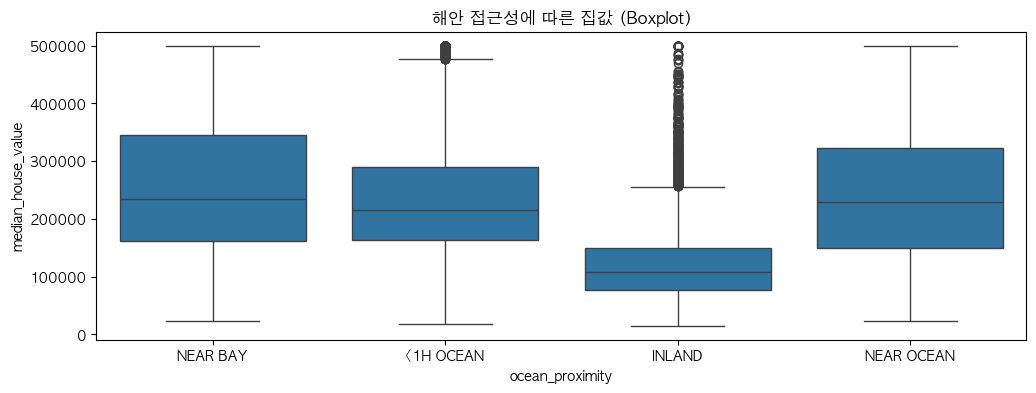

In [54]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df_eda)
plt.title("해안 접근성에 따른 집값 (Boxplot)")
plt.show()

inland(내륙) 만 이상치 값이 더 많음 ...! 
전체적으로 집 가격은 near bay > near ocean > 1H ocean > inland 
근데 내륙에 이상치가 매우 많은 것으로 보아 일부 부촌 지역이 있는거 같음.
inland 랑 나머지 그룹간에 명확한 가격 격차가 존재하긴 하고 .. 
inland 대비 해안 근처가 중간 가격 기준 2배 이상 비쌈.

근데 집 연식이 돼도 가격이 많이 나가는지 궁금해짐. 
집연식, 가격, 바다근처


In [55]:
# housing_median_age 컬럼 보기
df_eda['housing_median_age'].sort_values(ascending=False).value_counts()

housing_median_age
52.0    1262
36.0     856
35.0     818
16.0     762
17.0     694
34.0     682
26.0     611
33.0     609
25.0     562
32.0     560
18.0     560
37.0     528
15.0     507
19.0     499
27.0     481
24.0     473
30.0     470
28.0     468
20.0     462
29.0     452
31.0     449
23.0     445
21.0     444
14.0     410
22.0     395
38.0     385
39.0     366
42.0     363
44.0     353
43.0     351
40.0     301
13.0     298
41.0     293
45.0     286
10.0     263
11.0     252
46.0     245
5.0      242
12.0     236
9.0      204
8.0      203
47.0     195
4.0      190
48.0     174
7.0      173
6.0      157
50.0     135
49.0     133
3.0       62
2.0       58
51.0      47
1.0        4
Name: count, dtype: int64

In [56]:
# 연속형 변수 housing_median_age
df_eda['house_age_group'] = pd.cut(df_eda['housing_median_age'], 
                               bins = [0, 10, 20, 30, 40, 50, 60],
                               labels=['10년', '10~20년', '20~30년', '30~40년', '40~50년', '50년 이상'])

In [57]:
df_eda.columns

Index(['median_house_value', 'median_income', 'ocean_proximity',
       'housing_median_age', 'population', 'house_age_group'],
      dtype='object')

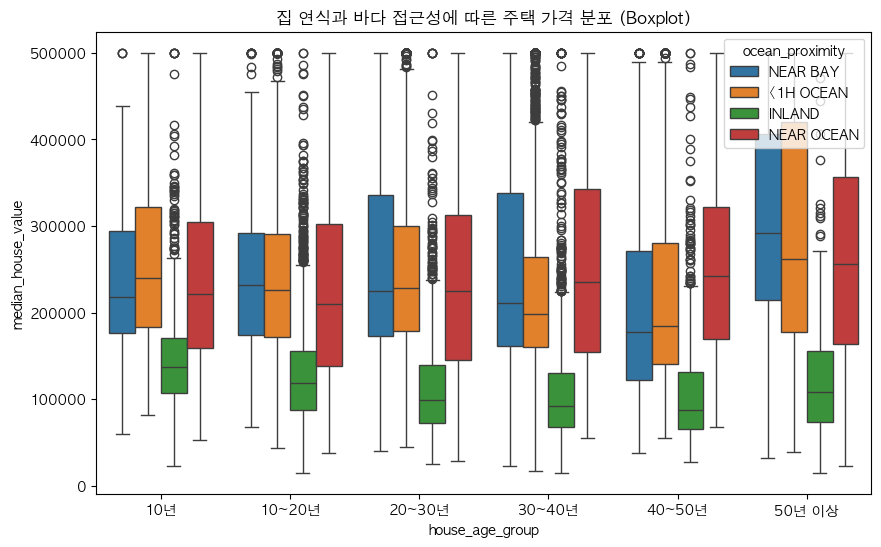

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x="house_age_group", y="median_house_value", hue = 'ocean_proximity', data=df_eda)
plt.title("집 연식과 바다 접근성에 따른 주택 가격 분포 (Boxplot)")
plt.show()

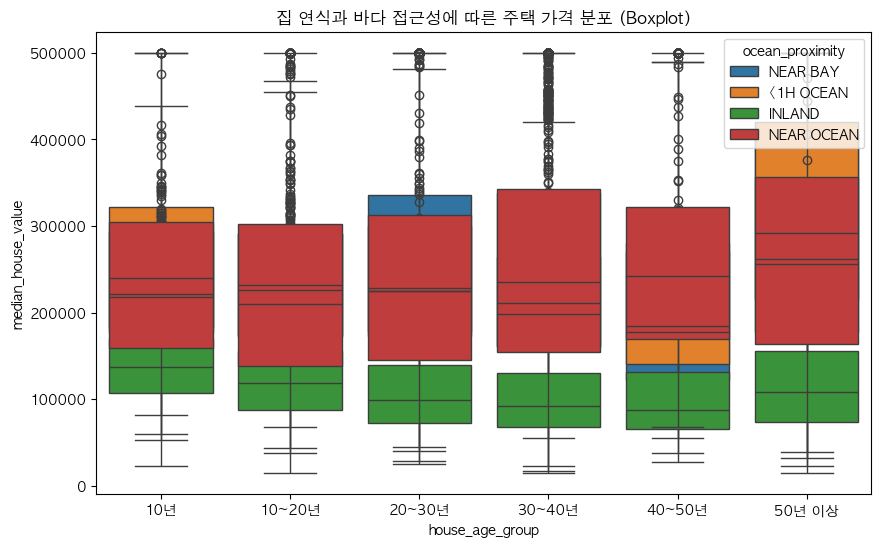

In [59]:
# hue 그룹 같이 보여줄거임
plt.figure(figsize=(10,6))
sns.boxplot(x="house_age_group", y="median_house_value", hue = 'ocean_proximity', data=df_eda, dodge = False)
plt.title("집 연식과 바다 접근성에 따른 주택 가격 분포 (Boxplot)")
plt.show()

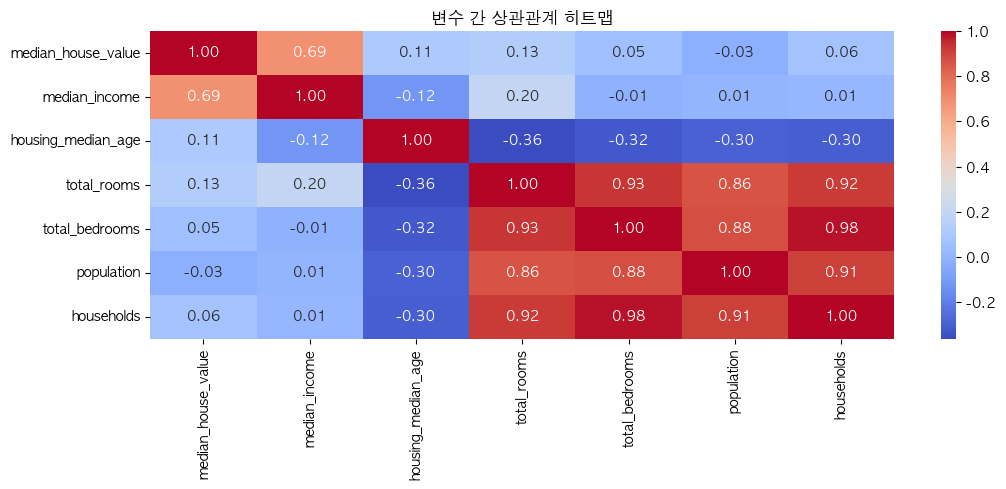

In [60]:
corr = df[['median_house_value', 'median_income', 'housing_median_age',
           'total_rooms', 'total_bedrooms', 'population', 'households']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수 간 상관관계 히트맵')
plt.show()


H0(귀무가설): 바다 접근성에 따른 주택가격의 평균은 모두 같다

=바다와의 거리와 관계 없이 주택 가격은 같음

H1(대립가설): 바다 접근성에 따라 적어도 하나의 주택가격의 평균은 다르다 

=바다접근성이 다르면 주택 가격에도 유의한 차이가 있다

| 구분 기준   | 검정 이름              | 데이터 형태 (독립변수 / 종속변수)   |
| ------- | ------------------ | ---------------------- |
| ✅ 평균 비교 | **t-test / ANOVA** | 범주형(그룹) vs **연속형(숫자)** |
| ✅ 비율 비교 | **카이제곱검정**         | 범주형 vs **범주형**         |
| ✅ 상관관계  | **피어슨 상관 / 스피어만**  | 연속형 vs **연속형**         |

독립변수 = 범주형

종속변수 = 연속형

In [61]:
# 통계 가설 검정 시작
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, levene, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scikit_posthocs as sp
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin': # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else: # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 시각화 기본 설정
plt.rcParams['figure.figsize'] = (12, 4)

# 전역 시드 설정
np.random.seed(42)

print("="*50)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*50)

라이브러리 로드 완료!
한글 폰트 설정 완료!


In [62]:
# 🔶 도우미 함수
def check_normality(data, group_labels, alpha=0.05):
    """
    각 그룹의 정규성 검정 수행
    
    ANOVA의 가정사항 중 정규성을 검증합니다.
    각 그룹별로 Shapiro-Wilk 검정을 수행하여 정규분포 여부를 판단합니다.
    
    Parameters
    ----------
    data : list of arrays
        각 그룹의 데이터를 담은 리스트
    group_labels : list
        각 그룹의 이름
    alpha : float
        유의수준 (기본값: 0.05)
    
    Returns
    -------
    bool
        모든 그룹이 정규성을 만족하는지 여부
        - True: 모든 그룹이 정규분포
        - False: 일부 그룹이 정규분포 아님
    """
    print("\n[정규성 검정 - Shapiro-Wilk Test]")
    print("-"*50)
    
    results = []
    for label, group_data in zip(group_labels, data):
        stat, p_value = shapiro(group_data)
        is_normal = "정규분포 ✓" if p_value > alpha else "정규분포 X"
        results.append({
            '그룹': label,
            'W-통계량': round(stat, 4),
            'p-value': round(p_value, 4),
            '판정': is_normal
        })
        
    result_df = pd.DataFrame(results)
    display(result_df)
    
    all_normal = all(r['p-value'] > alpha for r in results)
    if all_normal:
        print("\n✅ 모든 그룹이 정규성 가정을 만족합니다.")
    else:
        print("\n⚠️ 일부 그룹이 정규성 가정을 만족하지 않습니다.")
        print("   → 비모수 검정(Kruskal-Wallis) 고려")
    
    return all_normal


def check_homogeneity(data, group_labels, alpha=0.05):
    """
    등분산성 검정 수행
    
    ANOVA의 가정사항 중 등분산성을 검증합니다.
    Levene's test를 사용하여 그룹 간 분산의 동일성을 검정합니다.
    
    Parameters
    ----------
    data : list of arrays
        각 그룹의 데이터를 담은 리스트
    alpha : float
        유의수준 (기본값: 0.05)
    
    Returns
    -------
    bool
        등분산성 만족 여부
        - True: 등분산성 만족
        - False: 등분산성 위반
    """
    print("\n[등분산성 검정 - Levene's Test]")
    print("-"*50)
    
    stat, p_value = levene(*data)
    
    print(f"Levene 통계량: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value > alpha:
        print("✅ 등분산성 가정을 만족합니다.")
        equal_var = True
    else:
        print("⚠️ 등분산성 가정을 만족하지 않습니다.")
        print("   → Welch's ANOVA 또는 Games-Howell 사후검정 권장")
        equal_var = False
    
    return equal_var


def calculate_eta_squared(f_statistic, df_between, df_within):
    """
    에타제곱 (효과 크기) 계산
    
    ANOVA 결과의 실질적 중요성을 평가하는 효과 크기를 계산합니다.
    에타제곱은 집단 차이가 전체 변동의 몇 %를 설명하는지 나타냅니다.
    
     주의: 이 함수는 F 통계량을 이용한 근사 공식을 사용합니다.
    정확한 계산을 위해서는 SS(Sum of Squares) 값이 필요하지만,
    F 통계량만으로도 충분히 신뢰할 수 있는 근사치를 제공합니다.
    
    근사 공식: η² ≈ (F × df_between) / (F × df_between + df_within)
    정확한 공식: η² = SS_between / SS_total
    
    Parameters
    ----------
    f_statistic : float
        F 통계량
    df_between : int
        집단 간 자유도
    df_within : int
        집단 내 자유도
    
    Returns
    -------
    tuple
        (에타제곱 값, 해석 문구)
    """
    
    # 근사 공식 사용
    eta_squared = (f_statistic * df_between) / (f_statistic * df_between + df_within)
    
    if eta_squared < 0.01:
        interpretation = "매우 작은 효과"
    elif eta_squared < 0.06:
        interpretation = "작은 효과"
    elif eta_squared < 0.14:
        interpretation = "중간 효과"
    else:
        interpretation = "큰 효과"
    
    return eta_squared, interpretation

def calculate_epsilon_squared(h_statistic, k, n):
    """
    엡실론제곱 (비모수 효과 크기) 계산
    
    Kruskal-Wallis 검정 결과의 실질적 중요성을 평가하는 효과 크기를 계산합니다.
    엡실론제곱은 집단 차이가 전체 순위 변동의 몇 %를 설명하는지 나타냅니다.
    
    Parameters
    ----------
    h_statistic : float
        Kruskal-Wallis H 통계량
    k : int
        집단(그룹) 수
    n : int
        전체 표본 크기
    
    Returns
    -------
    tuple
        (엡실론제곱 값, 해석 문구)
    
    Notes
    -----
    공식: ε² = (H - k + 1) / (n - k)
    - H: Kruskal-Wallis H 통계량
    - k: 그룹 수
    - n: 전체 표본 수
    
    해석 기준 (Cohen's 기준과 동일):
    - < 0.01: 매우 작은 효과
    - 0.01 ~ 0.06: 작은 효과
    - 0.06 ~ 0.14: 중간 효과
    - ≥ 0.14: 큰 효과
    """
    # 엡실론제곱 계산
    epsilon_squared = (h_statistic - k + 1) / (n - k)
    
    
    # 효과 크기 해석
    if epsilon_squared < 0.01:
        interpretation = "매우 작은 효과"
    elif epsilon_squared < 0.06:
        interpretation = "작은 효과"
    elif epsilon_squared < 0.14:
        interpretation = "중간 효과"
    else:
        interpretation = "큰 효과"
    
    return epsilon_squared, interpretation


def perform_tukey_hsd(data, labels):
    """
    Tukey HSD 사후검정 수행
    
    ANOVA에서 유의한 차이가 발견된 경우, 어느 집단 간에 차이가 있는지
    구체적으로 확인하기 위한 다중비교 검정을 수행합니다.
    
    Parameters
    ----------
    data : list of arrays
        각 그룹의 데이터
    labels : list
        각 그룹의 이름
    
    Returns
    -------
    TukeyHSDResults
        Tukey HSD 검정 결과 객체
    """
    print("\n[Tukey HSD 사후검정]")
    print("-"*50)
    
    # 데이터를 긴 형식으로 변환
    all_data = []
    all_labels = []
    
    for label, group_data in zip(labels, data):
        all_data.extend(group_data)
        all_labels.extend([label] * len(group_data))
    
    # Tukey HSD 수행
    mc = MultiComparison(all_data, all_labels)
    result = mc.tukeyhsd()
    
    print(result)
    
    # -----------------------------------------------------------------------------
    # 결과 해석
    # -----------------------------------------------------------------------------
    print("\n[결과 해석]")
    print("-"*50)
    
    # 1. 각 그룹의 평균 계산 및 정렬
    group_means = {}
    for i, label in enumerate(labels):
        group_means[label] = np.mean(data[i])
    
    sorted_groups = sorted(group_means.items(), key=lambda x: x[1], reverse=True)
    
    print("평균 순위:")
    for rank, (group, mean) in enumerate(sorted_groups, 1):
        print(f"  {rank}위: {group} (평균: {mean:.2f})")
    
    # 2. 유의성 관계 파악
    print("\n그룹 간 관계:")
    sig_matrix = {}
    
    # Tukey 결과에서 정보 추출
    for row in result.summary().data[1:]:  # 헤더 제외
        group1 = str(row[0]).strip()
        group2 = str(row[1]).strip()
        meandiff = float(row[2])
        p_adj = float(row[3])
        reject = str(row[6]).strip() == 'True'
        
        # 양방향으로 저장
        sig_matrix[(group1, group2)] = reject
        sig_matrix[(group2, group1)] = reject
        
        # 관계 출력
        if reject:
            print(f"  • {group1} ≠ {group2} (p={p_adj:.4f}, 유의한 차이)")
        else:
            print(f"  • {group1} ≈ {group2} (p={p_adj:.4f}, 차이 없음)")

    
    # 3. 시각화
    fig = result.plot_simultaneous(figsize=(10, 6))
    plt.title('Tukey HSD 95% 신뢰구간')
    plt.xlabel('그룹 간 평균 차이')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return result


def perform_gameshowell(df, dv_col, group_col):
    """
    Games-Howell 사후검정 수행
    
    등분산성 가정을 만족하지 않을 때 사용하는 사후검정입니다.
    정규성은 만족하지만 등분산성이 위반된 경우에 적합합니다.
    
    Parameters
    ----------
    df : pandas.DataFrame
        분석할 데이터프레임
    dv_col : str
        종속변수(연속형) 컬럼명
    group_col : str
        집단변수(범주형) 컬럼명
    
    Returns
    -------
    pandas.DataFrame
        Games-Howell 검정 결과
    """
    import pingouin as pg
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    print("\n[Games-Howell 사후검정]")
    print("-"*50)
    print("※ 등분산성 가정을 만족하지 않아 Games-Howell 사용\n")
    
    # Games-Howell 수행
    result = pg.pairwise_gameshowell(dv=dv_col, between=group_col, data=df)
    
    # =========================================================================
    # pingouin 버전에 따른 컬럼명 확인 및 처리
    # =========================================================================
    # 최신 버전: 'pval'과 'reject' 대신 'p-unc'와 'sig' 사용
    # 구버전: 'pval'과 'reject' 사용
    
    # p-value 컬럼 확인
    if 'pval' in result.columns:
        pval_col = 'pval'
    elif 'p-unc' in result.columns:
        pval_col = 'p-unc'
    else:
        raise ValueError("p-value 컬럼을 찾을 수 없습니다.")
    
    # reject/sig 컬럼 확인 (없으면 직접 생성)
    if 'reject' not in result.columns and 'sig' not in result.columns:
        result['reject'] = result[pval_col] < 0.05
        reject_col = 'reject'
    elif 'reject' in result.columns:
        reject_col = 'reject'
    else:
        reject_col = 'sig'
        result['reject'] = result[reject_col]  # 호환성을 위해 'reject' 컬럼 추가
    
    # 결과 출력을 위한 컬럼 선택
    display_cols = ['A', 'B', 'mean(A)', 'mean(B)', 'diff', pval_col]
    if reject_col in result.columns:
        display_cols.append(reject_col)
    
    print("[사후검정 결과]")
    print("-"*50)
    try:
        from IPython.display import display
        display(result[display_cols].round(4))
    except ImportError:
        print(result[display_cols].round(4))
    
    # -----------------------------------------------------------------------------
    # 결과 해석
    # -----------------------------------------------------------------------------
    print("\n[결과 해석]")
    print("-"*50)
    
    # 1. 각 그룹의 평균 계산 및 정렬
    group_means = df.groupby(group_col)[dv_col].mean().sort_values(ascending=False)
    
    print("평균 순위:")
    for rank, (group, mean) in enumerate(group_means.items(), 1):
        print(f"  {rank}위: {group} (평균: {mean:.2f})")
    
    # 2. 유의성 관계 파악
    print("\n그룹 간 관계:")
    for _, row in result.iterrows():
        is_significant = row['reject']
        p_value = row[pval_col]
        
        if is_significant:
            print(f"  • {row['A']} ≠ {row['B']} (p={p_value:.4f}, 유의한 차이)")
        else:
            print(f"  • {row['A']} ≈ {row['B']} (p={p_value:.4f}, 차이 없음)")
    
    # 3. 시각화
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 평균 차이와 신뢰구간 시각화
    y_pos = range(len(result))
    comparisons = [f"{row['A']}-{row['B']}" for _, row in result.iterrows()]
    diffs = result['diff'].values
    
    # 신뢰구간 계산 (SE * 1.96)
    errors = result['se'].values * 1.96
    
    colors = ['red' if reject else 'gray' for reject in result['reject']]
    
    ax.barh(y_pos, diffs, xerr=errors, color=colors, alpha=0.6, capsize=5)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(comparisons)
    ax.set_xlabel('평균 차이 (95% CI)')
    ax.set_title('Games-Howell 사후검정 결과')
    ax.grid(True, alpha=0.3, axis='x')
    
    # 범례
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.6, label='유의한 차이 (p<0.05)'),
                      Patch(facecolor='gray', alpha=0.6, label='차이 없음 (p≥0.05)')]
    ax.legend(handles=legend_elements)
    
    plt.tight_layout()
    plt.show()
    
    return result


def perform_dunn_test(df, dv_col, group_col):
    """
    Dunn's 사후검정 수행
    
    Kruskal-Wallis 검정 후 사용하는 비모수 사후검정입니다.
    정규성 가정을 만족하지 않을 때 사용합니다.
    
    Parameters
    ----------
    df : pandas.DataFrame
        분석할 데이터프레임
    dv_col : str
        종속변수(연속형) 컬럼명
    group_col : str
        집단변수(범주형) 컬럼명
    
    Returns
    -------
    pandas.DataFrame
        Dunn's test 검정 결과
    """
    print("\n[Dunn's Test 사후검정]")
    print("-"*50)
    print("※ 정규성 가정을 만족하지 않아 비모수 사후검정 사용\n")
    
    # Dunn's test 수행 (Bonferroni 보정)
    # 반환되는 p-value는 이미 다중비교 보정이 완료된 값
    dunn_result = sp.posthoc_dunn(df, val_col=dv_col, 
                                    group_col=group_col, p_adjust='bonferroni')
    
    print("[사후검정 결과 - p-value 행렬 (Bonferroni 보정 적용됨)]")
    print("-"*50)
    display(dunn_result.round(4))
    
    # -----------------------------------------------------------------------------
    # 결과 해석
    # -----------------------------------------------------------------------------
    print("\n[결과 해석]")
    print("-"*50)
    
    # 1. 각 그룹의 중앙값 계산 및 정렬
    group_medians = df.groupby(group_col)[dv_col].median().sort_values(ascending=False)
    
    print("중앙값 순위 (비모수 검정은 순위 기반이므로 중앙값 참조):")
    for rank, (group, median) in enumerate(group_medians.items(), 1):
        mean = df.groupby(group_col)[dv_col].mean()[group]
        print(f"  {rank}위: {group} (중앙값: {median:.2f}, 참고-평균: {mean:.2f})")
    
    # 2. 유의성 관계 파악
    print("\n그룹 간 관계:")
    groups = dunn_result.columns.tolist()
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            p_val = dunn_result.iloc[i, j]
            sig = "유의한 차이" if p_val < 0.05 else "차이 없음"
            symbol = "≠" if p_val < 0.05 else "≈"
            print(f"  • {groups[i]} {symbol} {groups[j]} (p={p_val:.4f}, {sig})")
    
    # 3. 시각화
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 히트맵으로 p-value 시각화
    import seaborn as sns
    
    # p-value를 색상으로 표현 (낮을수록 진한 색)
    mask = np.triu(np.ones_like(dunn_result, dtype=bool))
    
    sns.heatmap(dunn_result, mask=mask, annot=True, fmt='.4f', 
                cmap='RdYlGn_r', center=0.05, vmin=0, vmax=0.2,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                ax=ax)
    
    ax.set_title('Dunn\'s Test p-value 히트맵\n(낮을수록 유의한 차이, Bonferroni 보정 적용)')
    plt.tight_layout()
    plt.show()
    
    return dunn_result

In [63]:
# 그룹별로 리스트화
inland = df_eda[df_eda['ocean_proximity'] == 'INLAND']['median_house_value']
near_ocean = df_eda[df_eda['ocean_proximity'] == 'NEAR OCEAN']['median_house_value']
ocean_1h = df_eda[df_eda['ocean_proximity'] == '<1H OCEAN']['median_house_value']
near_bay = df_eda[df_eda['ocean_proximity'] == 'NEAR BAY']['median_house_value']

In [64]:
# 데이터 프레임 생성
housing_data = pd.DataFrame({
    'INLAND': inland,
    'NEAR OCEAN': near_ocean,
    '<1H OCEAN': ocean_1h,
    'NEAR BAY': near_bay
})

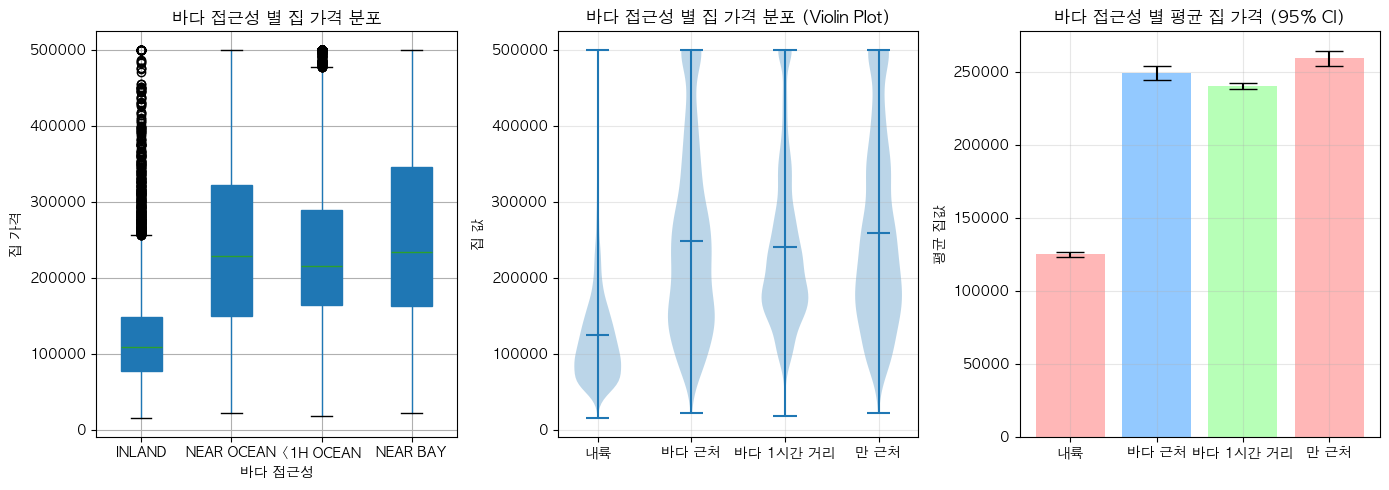

In [65]:
# 시각화
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# 박스플롯
housing_data.boxplot(ax=axes[0], grid=True, patch_artist=True)
axes[0].set_title('바다 접근성 별 집 가격 분포')
axes[0].set_ylabel('집 가격')
axes[0].set_xlabel('바다 접근성')

# 바이올린 플롯
parts = axes[1].violinplot(
    [inland, near_ocean, ocean_1h, near_bay],
    positions=[1, 2, 3, 4], showmeans=True, showextrema=True
)
axes[1].set_title('바다 접근성 별 집 가격 분포 (Violin Plot)')
axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(['내륙', '바다 근처', '바다 1시간 거리', '만 근처'])
axes[1].set_ylabel('집 값')
axes[1].grid(True, alpha=0.3)

# 평균과 95% 신뢰구간
means = [np.mean(inland), np.mean(near_ocean), np.mean(ocean_1h), np.mean(near_bay)]
sems = [stats.sem(inland), stats.sem(near_ocean), stats.sem(ocean_1h), stats.sem(near_bay)]
x_pos = np.arange(len(means))

axes[2].bar(x_pos, means, yerr=[1.96*s for s in sems], capsize=10,
            color=['#ff9999', '#66b3ff', '#99ff99'], alpha=0.7)
axes[2].set_title('바다 접근성 별 평균 집 가격 (95% CI)')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(['내륙', '바다 근처', '바다 1시간 거리', '만 근처'])
axes[2].set_ylabel('평균 집값')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [66]:
print("\n[일원배치 ANOVA]")
print("-"*50)

# 가설 설정
print("H₀: 바다 접근성에 따른 주택 가격의 평균은 모두 같다.")
print("    μ₁ = μ₂ = μ₃")
print("H₁: 바다 접근성에 따라 적어도 하나의 주택가격의 평균은 다르다.")
print("    적어도 하나의 μᵢ ≠ μⱼ")
print("유의수준: α = 0.05")

# 기술 통계
stats_data = {
    '바다 접근성': ['내륙', '바다 근처', '바다 한시간 거리', '만 근처'],
    '표본수': [len(inland), len(near_ocean), len(ocean_1h), len(near_bay)],
    '평균': [np.mean(inland), np.mean(near_ocean), np.mean(ocean_1h), np.mean(near_bay)],
    '표준편차': [np.std(inland, ddof=1), np.std(near_ocean, ddof=1), 
                 np.std(ocean_1h, ddof=1), np.std(near_bay)],
    '최소값': [np.min(inland), np.min(near_ocean), np.min(ocean_1h), np.min(near_bay)],
    '최대값': [np.max(inland), np.max(near_ocean), np.max(ocean_1h), np.max(near_bay)]
}
stats_df = pd.DataFrame(stats_data)
display(stats_df.round(2))


[일원배치 ANOVA]
--------------------------------------------------
H₀: 바다 접근성에 따른 주택 가격의 평균은 모두 같다.
    μ₁ = μ₂ = μ₃
H₁: 바다 접근성에 따라 적어도 하나의 주택가격의 평균은 다르다.
    적어도 하나의 μᵢ ≠ μⱼ
유의수준: α = 0.05


,바다 접근성,표본수,평균,표준편차,최소값,최대값
0,내륙,6496,124896.86,70057.96,14999.0,500001.0
1,바다 근처,2628,249042.36,122548.01,22500.0,500001.0
2,바다 한시간 거리,9034,240267.99,106198.32,17500.0,500001.0
3,만 근처,2270,259279.29,122826.68,22500.0,500001.0


In [67]:
data_groups = [inland, near_ocean, ocean_1h, near_bay]
group_labels = ['내륙', '바다 근처', '바다 한시간 거리', '만 근처']

# 정규성 검정
is_normal = check_normality(data_groups, group_labels)
# 등분산성 검정 
is_equal_valr = check_homogeneity(data_groups, group_labels)


[정규성 검정 - Shapiro-Wilk Test]
--------------------------------------------------


,그룹,W-통계량,p-value,판정
0,내륙,0.8213,0.0,정규분포 X
1,바다 근처,0.9335,0.0,정규분포 X
2,바다 한시간 거리,0.9093,0.0,정규분포 X
3,만 근처,0.9377,0.0,정규분포 X



⚠️ 일부 그룹이 정규성 가정을 만족하지 않습니다.
   → 비모수 검정(Kruskal-Wallis) 고려

[등분산성 검정 - Levene's Test]
--------------------------------------------------
Levene 통계량: 580.0730
p-value: 0.0000
⚠️ 등분산성 가정을 만족하지 않습니다.
   → Welch's ANOVA 또는 Games-Howell 사후검정 권장


In [68]:
# Step 3: 검정 수행
# 정규성 위반해서 비모수 검정 Kruskal-Wallis 할 예정
if not is_normal:
    print("⚠️ 정규성 가정이 위반되었으므로 비모수 검정을 수행합니다.")
    print("\n[Kruskal-Wallis 검정 (비모수 검정)]")
    print("\- Kruskal-Wallis 검정은 또한 등분산성 가정이 필요 없음")
    print("-"*50)
    h_stat, p_value = stats.kruskal(*data_groups)
    
    # 자유도 및 효과 크기 계산
    k = len(data_groups)
    N = sum(len(group) for group in data_groups)
    df = k - 1
    
    # 비모수 효과 크기 계산
    epsilon_sq, effect_interpretation = calculate_epsilon_squared(h_stat, k, N)
    print(f"H-통계량: {h_stat:.4f}")
    print(f"자유도: {df}")
    print(f"p-value: {p_value:.6f}")
    print(f"효과 크기 (ε²): {epsilon_sq:.4f} ({effect_interpretation})")
    print(f"   → 지역 차이가 전체 순위 변동의 {epsilon_sq*100:.1f}% 설명")
    
    # 결론
    print("\n[검정 결론]")
    if p_value < 0.05:
        print(f"✅ p-value({p_value:.6f}) < 0.05 → 귀무가설 기각")
        print("   바다 접근성에 따른 집 가격에 유의한 차이가 있음")
    else:
        print(f"❌ p-value({p_value:.6f}) ≥ 0.05 → 귀무가설 채택")
        print("   바다 접근성에 따른 집 가격에 유의한 차이가 없음")

⚠️ 정규성 가정이 위반되었으므로 비모수 검정을 수행합니다.

[Kruskal-Wallis 검정 (비모수 검정)]
\- Kruskal-Wallis 검정은 또한 등분산성 가정이 필요 없음
--------------------------------------------------
H-통계량: 6558.0831
자유도: 3
p-value: 0.000000
효과 크기 (ε²): 0.3210 (큰 효과)
   → 지역 차이가 전체 순위 변동의 32.1% 설명

[검정 결론]
✅ p-value(0.000000) < 0.05 → 귀무가설 기각
   바다 접근성에 따른 집 가격에 유의한 차이가 있음


In [69]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#통계 관련
from scipy import stats
import statsmodels.api as sm

#머신러닝 할 때 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression  #---> 오늘 사용할 모델

#train - test 데이터 나누기 위해서
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error #회귀 평가 지표

In [70]:
import numpy as np
import pandas as pd

# 스케일링, 폴리노미얼, 라벨인코딩, SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from imblearn.over_sampling import SMOTE

# VIF 계산용
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# 데이터 준비
# 연식, 인구, 소득, 바다 접근성
features = ['housing_median_age', 'median_income', 'population', 'ocean_proximity']
target = "median_house_value"

X = df_eda[features]
y = df_eda[target]

In [72]:
# 독립변수 (dataframe 형태 유지)
# 종속변수는 단일 열이라서 numpy 배열 (1차원)만 있으면 충분
X = df_eda[features].copy()
y = df_eda[target].values
# 원-핫 인코딩
# ocean_proximity는 범주형이므로 원-핫 인코딩이 필요
# pd.get_dummies 는 dataframe 전용 함수라서 값을 데이터프레임으로 바꿔야 함. 
# drop_first=True 는 다중공선성 문제 방지로 첫번째 지움.
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

print("=== [라벨 인코딩 + 원핫 인코딩 결과 컬럼] ===")
print(X.head())
print()

=== [라벨 인코딩 + 원핫 인코딩 결과 컬럼] ===
   housing_median_age  median_income  population  ocean_proximity_INLAND  \
0                41.0         8.3252       322.0                   False   
1                21.0         8.3014      2401.0                   False   
2                52.0         7.2574       496.0                   False   
3                52.0         5.6431       558.0                   False   
4                52.0         3.8462       565.0                   False   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                      True                       False  
1                      True                       False  
2                      True                       False  
3                      True                       False  
4                      True                       False  



In [73]:
# 데이터 분리 (학습용, 평가용)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [74]:
# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_scaled = df_eda.copy()

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df_scaled['housing_median_age_std'] = scaler_std.fit_transform(df_scaled[['housing_median_age']])
df_scaled['median_income_std'] = scaler_std.fit_transform(df_scaled[['median_income']])
df_scaled['population_std'] = scaler_std.fit_transform(df_scaled[['population']])

df_scaled['housing_median_age_minmax'] = scaler_minmax.fit_transform(df_scaled[['housing_median_age']])
df_scaled['median_income_minmax'] = scaler_minmax.fit_transform(df_scaled[['median_income']])
df_scaled['population_minmax'] = scaler_minmax.fit_transform(df_scaled[['population']])

print("=== [스케일링 결과 컬럼 확인] ===")
print(df_scaled[['housing_median_age', 'housing_median_age_std', 'housing_median_age_minmax',
                 'median_income', 'median_income_std', 'median_income_minmax',
                 'population', 'population_std', 'population_minmax']].head())
print()

=== [스케일링 결과 컬럼 확인] ===
   housing_median_age  housing_median_age_std  housing_median_age_minmax  \
0                41.0                0.982560                   0.784314   
1                21.0               -0.606022                   0.392157   
2                52.0                1.856279                   1.000000   
3                52.0                1.856279                   1.000000   
4                52.0                1.856279                   1.000000   

   median_income  median_income_std  median_income_minmax  population  \
0         8.3252           2.344844              0.539668       322.0   
1         8.3014           2.332314              0.538027      2401.0   
2         7.2574           1.782662              0.466028       496.0   
3         5.6431           0.932756              0.354699       558.0   
4         3.8462          -0.013287              0.230776       565.0   

   population_std  population_minmax  
0       -0.973424           0.008941  
1 

In [75]:
# 다중공선성
df_corr = df_eda[['housing_median_age', 'median_income', 'population', 'ocean_proximity']].copy()
df_corr = pd.get_dummies(df_corr, columns=['ocean_proximity'], drop_first=True, dtype= float)
print("=== [상관계수] ===")
print(df_corr.corr())

# VIF 계산 함수
def calc_vif(df_input):
    vif_data = []
    for i in range(df_input.shape[1]):
        vif = variance_inflation_factor(df_input.values, i)
        vif_data.append((df_input.columns[i], vif))
    return pd.DataFrame(vif_data, columns=['feature','VIF'])

vif_df = calc_vif(df_corr)
print("\n=== [VIF 결과] ===")
print(vif_df)
print()

=== [상관계수] ===
                            housing_median_age  median_income  population  \
housing_median_age                    1.000000      -0.118191   -0.295715   
median_income                        -0.118191       1.000000    0.004989   
population                           -0.295715       0.004989    1.000000   
ocean_proximity_INLAND               -0.236859      -0.237660   -0.019716   
ocean_proximity_NEAR BAY              0.256313       0.056629   -0.061542   
ocean_proximity_NEAR OCEAN            0.020905       0.027297   -0.023563   

                            ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
housing_median_age                       -0.236859                  0.256313   
median_income                            -0.237660                  0.056629   
population                               -0.019716                 -0.061542   
ocean_proximity_INLAND                    1.000000                 -0.241432   
ocean_proximity_NEAR BAY                 -0.2

In [76]:
display(vif_df.sort_values('VIF',ascending=False))

,feature,VIF
1,median_income,3.415424
0,housing_median_age,3.368644
2,population,2.132167
3,ocean_proximity_INLAND,1.444374
4,ocean_proximity_NEAR BAY,1.308058
5,ocean_proximity_NEAR OCEAN,1.243740


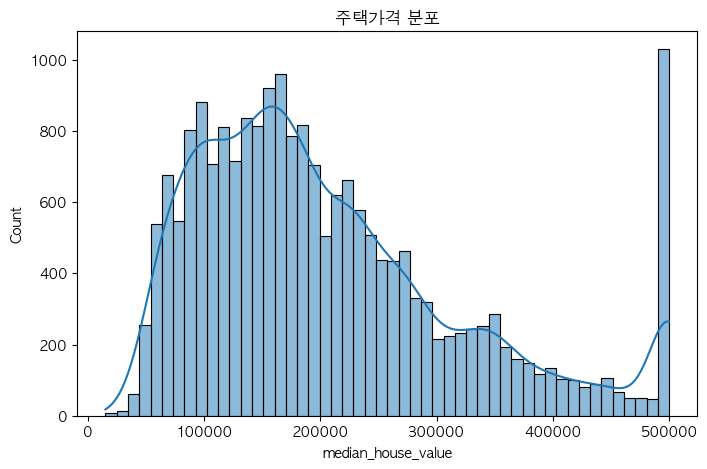

In [82]:
# 타깃값 분포 확인 
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], bins = 50, kde=True)
plt.title('주택가격 분포')
plt.show()

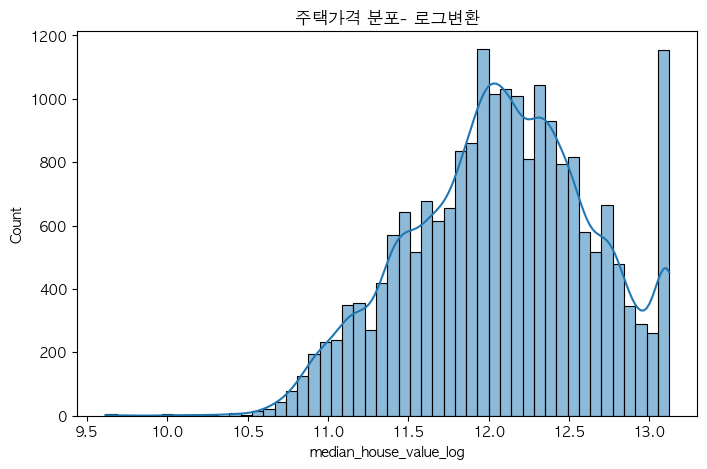

In [83]:
# 로그변환으로 분포 안정화
df['median_house_value_log'] = np.log1p(df['median_house_value'])

plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value_log'], bins = 50, kde=True)
plt.title('주택가격 분포- 로그변환')
plt.show()

In [84]:
# 모델 학습 (머신러닝 접근) + 예측 
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred_raw = linreg.predict(X_test)

r2 = r2_score(y_test, pred_raw)
rmse = np.sqrt(mean_squared_error(y_test, pred_raw))
mae= mean_absolute_error(y_test, pred_raw)

print("\n[LinearRegression on RAW target]")
print(f"R2  : {r2_score(y_test, pred_raw):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, pred_raw):.2f}")
print(f"MAE : {mean_absolute_error(y_test, pred_raw):.2f}")


[LinearRegression on RAW target]
R2  : 0.599
RMSE: 72911.43
MAE : 52985.71


In [85]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, roc_auc_score, f1_score,
    confusion_matrix, classification_report, RocCurveDisplay
)

#오늘의 주인공
#가장 기본적인 형태 트리 모델 (얘넨 학습 목적임)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#훨씬 좋은 모델
#모델 단독이 아니라 여러모델 만들어서 일반화 높이고 과적합 완화시킬 수 있음.
#앙상블은 최고다 ! ---> 앙상블 안에 부스팅이 있는 거 
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool

In [86]:
# 트리기반 모델
models = {
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    
    "XGBoost" : XGBRegressor(
        n_estimators=300, max_depth=4, learning_rate=0.05,
        subsample=0.9, colsample_bytree=0.8, eval_metric="rmse",
        n_jobs=-1, random_state=42
    ),
    "CatBoost" : CatBoostRegressor(
        iterations=400, depth=4, learning_rate=0.05,
        loss_function="RMSE",
        verbose=False, random_state=42)
}

In [87]:
summary = []
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    

    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae= mean_absolute_error(y_test, pred)

    summary.append([name, r2, rmse, mae])

summary_df = pd.DataFrame(summary, columns=['모델', 'r2', 'rmse', 'mae']).sort_values('r2', ascending=False)
print(summary_df)

             모델        r2          rmse           mae
2       XGBoost  0.647721  68343.928928  48250.864446
3      CatBoost  0.647618  68353.926170  48373.008777
1  RandomForest  0.611861  71738.164176  51110.484214
0  DecisionTree  0.286103  97291.381543  67320.858786


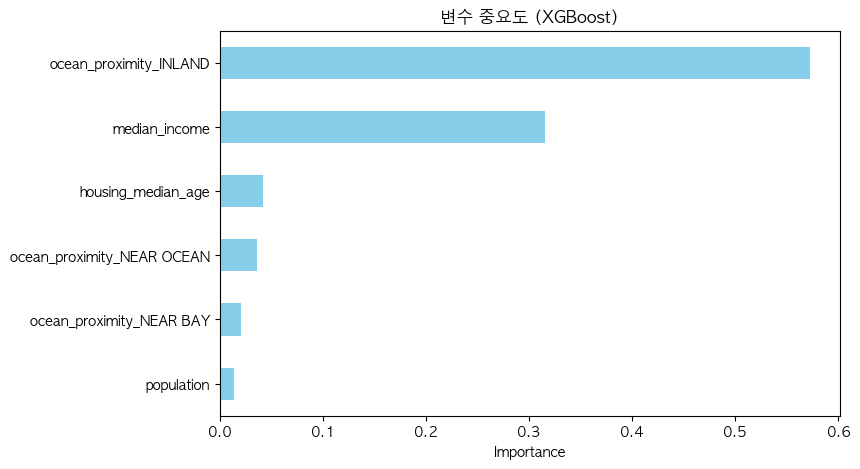

In [88]:
best_model = models["XGBoost"]  # 성능 제일 좋았던 모델
importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='skyblue')
plt.title('변수 중요도 (XGBoost)')
plt.xlabel('Importance')
plt.show()

